In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

from mod import *

In [2]:
import time

# 4장 - 신경망 학습

## 4.2 손실함수

### 4.2.1 평균 제곱 오차

In [3]:
y = [.1, .05, .6, 0, .05, .1, 0, .1, 0, 0]
t = np.zeros(len(y))
t[2] = 1

t1 = np.zeros(len(y))
t1[3] = 1

In [4]:
sum((y-t)**2) / 2

0.09750000000000003

In [5]:
sum((y-t1)**2) / 2

0.6975

In [6]:
def mse(y, t):
    return np.sum((y-t)**2) / 2

In [7]:
mse(y, t)

0.09750000000000003

### 4.2.2 교차엔트로피 오차

In [8]:
def _cee(y, t):
    delta = 1e-7
    arr = np.log(np.array(y) + delta)
    return -np.sum(arr * t)

### 4.2.3 미니배치 학습

In [9]:
cwd = os.getcwd()
sys.path.append(os.getcwd())
os.chdir('./deep-learning-from-scratch-master')

from dataset.mnist import load_mnist

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [11]:
prints(x_train)
prints(t_train)

shape-x_train:(60000, 784)
shape-t_train:(60000, 10)


In [12]:
batch_size = 10

train_size = x_train.shape[0]
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [13]:
def cee(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size) ,t] + 1e-7)) / batch_size # y[np.arange(batch_size) ,t]: y에 대해 인덱싱 수행

In [14]:
import random
_randint = [random.randint(1, batch_size) for _ in range(batch_size)]
randint = np.array(_randint)
randint.reshape(1, randint.size)
[np.arange(batch_size)]

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

## 4.3 수치 미분

### 4.3.1 미분

In [15]:
def num_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

In [16]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [17]:
def gradient_graph(f, x):
    a = num_diff(f, x)
    b = function_1(x) - a * x
    range_x = np.arange(x-10, x+10, 0.1)
    y = a * range_x + b
    plt.plot(range_x, y)

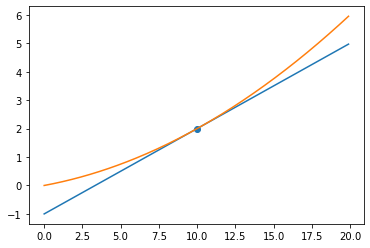

In [18]:
x = np.arange(0, 20, .1)
y = function_1(x)

x_value = 10
gradient_graph(function_1, x_value)
plt.plot(x, y)
plt.scatter(x_value, function_1(x_value))

plt.show()

In [19]:
num_diff(function_1, 10)

0.2999999999986347

### 4.3.3 편미분

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2

assert function_2([1, 2]) == 5

In [21]:
def function_tmp1(x0):
    return x0**2 + 4.0**2.0
num_diff(function_tmp1, 3.0)

6.00000000000378

In [22]:
def function_tmp2(x1):
    return 3.0**2 + x1**2.0
num_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기

In [23]:
h = 1e-4
def f(x):
    return x[0]**2 + x[1]**2

assert f([1, 2]) == 5

In [24]:
def num_grad(f, x):
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

assert all(num_grad(f, np.array([3., 4.])).round() == np.array([6., 8.]))

### 4.4.1 경사법(경사하강법)

In [25]:
def grad_descent(f, init_x, lr=.01, step_num=100):
    x = init_x
    a, b = x
    plt.scatter(a, b)
    for _ in range(step_num):
        x -= lr * num_grad(f, x)
        a, b = x
        plt.scatter(a, b)
        plt.text(a, b, _+1)
    return x

In [26]:
f([3, 4])

25

In [27]:
init_x = np.array([-3., 4.])
lr = .1
step_num = 100

array([-6.11110793e-10,  8.14814391e-10])

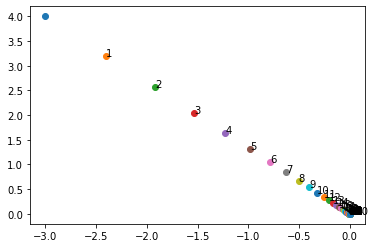

In [28]:
grad_descent(f=f, init_x=init_x, lr=lr, step_num=step_num)

In [29]:
#todaytime = 1610353965.7306166
#page = 131
#next_thing_to-do = "matplotlib을 이용하여 변화를 추적한다"

In [30]:
import datetime

def getstartTime():
    startTime = datetime.datetime.today()
    print(startTime.strftime("%Y년 %m월 %d일 %A, %H시 %M분"))
    return startTime

In [31]:
startTime = getstartTime()

2021년 01월 14일 Thursday, 20시 39분


In [32]:
endTime = datetime.datetime.today()
studyingSeconds = endTime - startTime
studyingTimeint = (studyingSeconds.total_seconds() / 60)

## 4.4.2 신경망에서의 기울기

In [33]:
# 2021년 01월 14일 Thursday, 16시 16분
# startTime = startTime()

In [34]:
from mod import softmax

In [35]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cee(y, t)
        return loss

In [36]:
lr = 1
x = np.array([.6, .9])
t = np.array([0, 0, 1])
net = simpleNet()

In [37]:
def f(W):
    return net.loss(x, t)

In [38]:
def num_grad(f, x):
    original_shape = x.shape    
    x = x.reshape(x.size, 1)    
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad.reshape(original_shape)    

# assert all(num_grad(f, np.array([3., 4.])).round() == np.array([6., 8.]))

In [39]:
net.W -= (lr * num_grad(f, net.W))
net.loss(x, t)

0.4099352949258589

In [40]:
net.W

array([[-0.05949977,  0.69324626,  0.48791961],
       [-0.48699931, -1.51040347,  0.44308721]])

## 4.5 학습 알고리즘 구현하기

In [69]:
def sigmoid(x):
    e = np.exp(-x)
    return 1/(1+e)

In [129]:
def softmax(x):
    x = np.array(x)
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [105]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.ones(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.ones(output_size)
        
    def predict(self, x):
        W1 = self.params['W1']
        b1 = self.params['b1']
        W2 = self.params['W2']
        b2 = self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

In [107]:
input_size = 2
net = TwoLayerNet(input_size, 3, 2)

In [108]:
dataCnt = 5
x = np.random.randn(dataCnt * input_size).reshape(dataCnt, input_size)

In [141]:
t = [[0,1],[1,0],[0,1],[1,0],[0,1]]
t = np.array(t)
t.shape

(5, 2)

In [112]:
W1 = net.params['W1']
b1 = net.params['b1']

In [116]:
a1 = np.dot(x, W1) + 1

In [119]:
z1 = sigmoid(a1)

In [121]:
W2 = net.params['W2']
b2 = net.params['b2']

In [124]:
a2 = np.dot(z1, W2) + b2

In [136]:
y = softmax(a2)

In [152]:
acc = np.sum(np.argmax(t, axis=1) == np.argmax(y, axis=1)) / float(t.shape[0])

In [160]:
cee(y, np.argmax(t, axis=1))

0.6926785460236349

In [156]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [170]:
-np.sum(np.log(y[np.arange(5), np.argmax(t, axis=1)] + 1e-7)) / 5

0.6926785460236349

In [42]:
# 2021년 01월 14일 Thursday, 20시 56분